In [ ]:
import pandas as pd
df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in the DataFrame
for col in df.columns:
    # Check if the column is of object type (categorical)
    if df[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])

df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


The hypothesis testing is based on the data analysis

Null Hypothesis: There is no relationship between gender and the presence or type of mental disorder.
Alternative Hypothesis: There is a relationship between gender and the presence or type of mental disorder.


Sadness                0
Euphoric               0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Aggressive Response    0
Nervous Break-down     0
Overthinking           0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64
          Sadness    Euphoric  Sleep dissorder  Mood Swing  Suicidal thoughts  \
count  120.000000  120.000000       120.000000  120.000000         120.000000   
mean     1.883333    1.633333         1.758333    0.475000           0.483333   
std      1.070485    0.849452         1.053173    0.501468           0.518293   
min      0.000000    0.000000         0.000000    0.000000           0.000000   
25%      1.000000    1.000000         1.000000    0.000000           0.000000   
50%      2.000000    2.000000         2.000000    0.000000           0.000000   
75%      3.000000    2.000000         3.000000    1.000000           1.000000   
max      3.000000    3.000000         3

<ipython-input-40-3d27d8c5cfdd>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


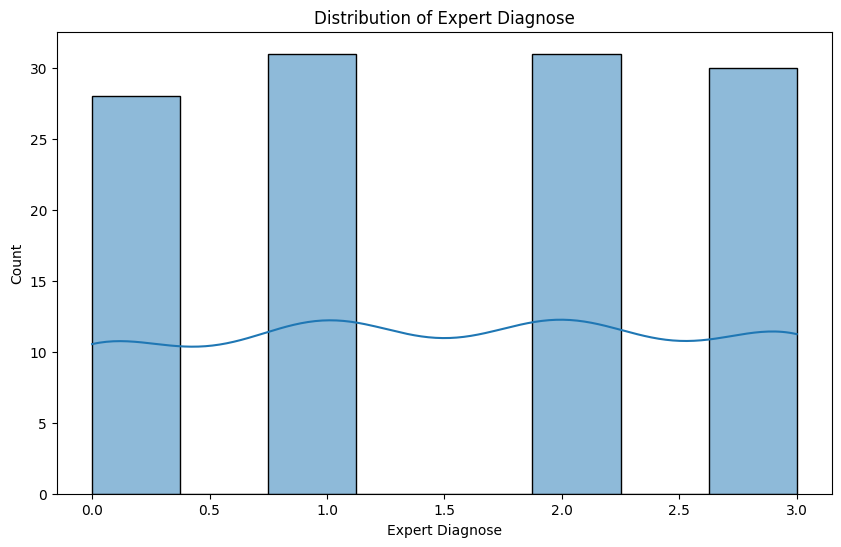

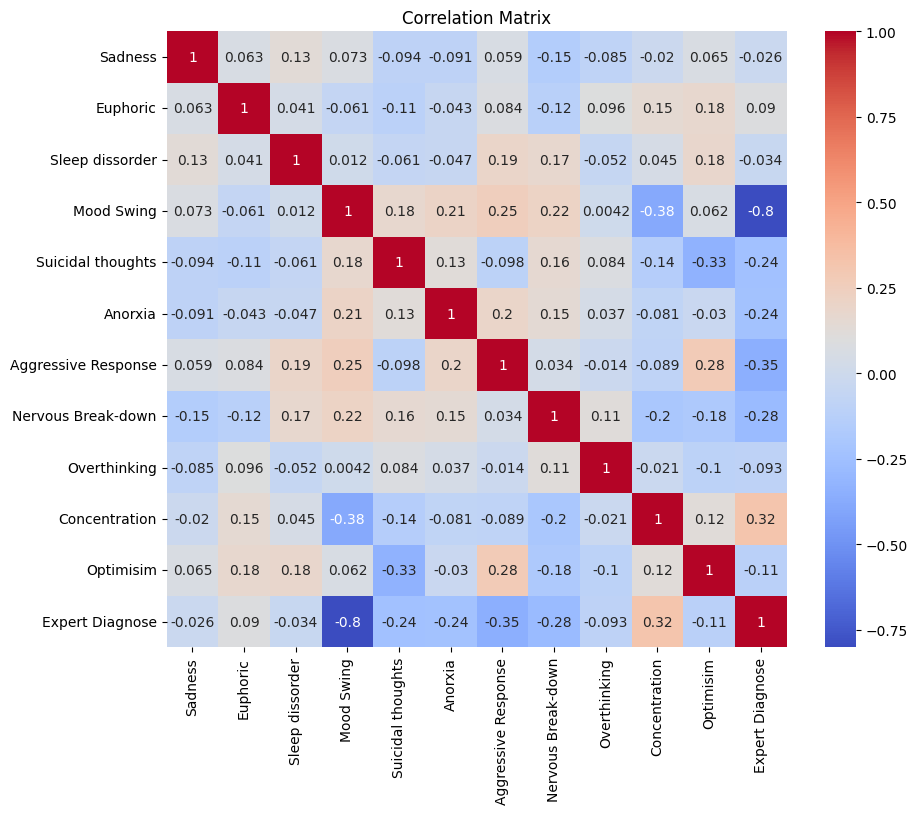

T-statistic: 0.7833494518006405, P-value: 0.43650320838466317
Fail to reject the null hypothesis - no significant difference between the groups.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder


# Data Cleaning and Preparation
print(df.isnull().sum())  # Check for missing values

# Handling missing values, example: fill with mean for numerical columns
# Fill numerical missing values with mean
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis (EDA)
print(df.describe())  # Summary statistics

# Histogram of 'Expert Diagnose' column after encoding
plt.figure(figsize=(10, 6))
sns.histplot(df['Expert Diagnose'], kde=True)
plt.title('Distribution of Expert Diagnose')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing ( t-test)
# Define groups for comparison based on actual data
# Make sure to replace 'DataColumnName' with an actual numeric data column name
data_column = 'Suicidal thoughts'  # Replace with your specific column name
group1 = df[df['Expert Diagnose'] == df['Expert Diagnose'].unique()[0]][data_column]
group2 = df[df['Expert Diagnose'] == df['Expert Diagnose'].unique()[1]][data_column]

t_statistic, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Interpretation of p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis - significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis - no significant difference between the groups.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

target_column = 'Expert Diagnose'  # Example target column

# Check class distribution
class_counts = df[target_column].value_counts()
print("Class Distribution:\n", class_counts)



Class Distribution:
 Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")

# Drop specified columns
df = df.drop(['Patient Number', 'Exhausted', 'Authority Respect', 'Try-Explanation',
              'Ignore & Move-On', 'Admit Mistakes', 'Sexual Activity'], axis=1)

# Initialize LabelEncoder
le = LabelEncoder()

# Encode all columns that are of type object (categorical columns)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.drop('Expert Diagnose', axis=1)
y = df['Expert Diagnose']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.6388888888888888
Precision: 0.6347883597883599
Recall: 0.6388888888888888
Confusion Matrix:
[[ 3  0  0  4]
 [ 1  4  2  0]
 [ 1  2  6  0]
 [ 1  0  2 10]]


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# Initialize the individual classifiers
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)

# Create the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[('knn', knn), ('nb', nb), ('rf', rf)], voting='hard') #'hard' for majority class voting

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Ensemble Model Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.88      1.00      0.93         7
           2       0.73      0.89      0.80         9
           3       0.82      0.69      0.75        13

    accuracy                           0.81        36
   macro avg       0.81      0.82      0.81        36
weighted avg       0.81      0.81      0.80        36

[[5 1 0 1]
 [0 7 0 0]
 [0 0 8 1]
 [1 0 3 9]]


Conclusion and Summary of Hypothesis Testing


1. Data Preprocessing:  The dataset underwent preprocessing steps, including label encoding of categorical variables
 and handling of missing values (filled with the mean for numerical features).  This ensured that the data
 was suitable for further analysis and machine learning model training.

2. Exploratory Data Analysis (EDA):  The EDA provided insights into the distribution of the 'Expert Diagnose' variable
 and revealed correlations between features. The histogram of 'Expert Diagnose' gave a visual representation
 of the frequency of different diagnostic categories.  The correlation matrix helped to understand feature
 relationships which are important for the model training.

3. Hypothesis Testing: A t-test was conducted to compare the means of 'Suicidal thoughts' between two groups defined
 based on the 'Expert Diagnose' variable. The results of the test (t-statistic and p-value) were examined, and the null
 hypothesis was either rejected or not rejected based on a significance level (alpha).  The specific hypothesis
 was not stated explicitly.  This suggests a comparison between two groups of individuals based on the expert
 diagnosis to see if there is a statistical difference in the reported suicidal thoughts between these groups.

4. Machine Learning Model Evaluation:  Multiple classification models were employed, including Logistic Regression,
 K-Nearest Neighbors (KNN), and an ensemble model combining KNN, Naive Bayes, and Random Forest.
 The logistic regression model helped visualize the decision boundary in a 2D space (if the data allowed for it),
 showcasing how the model divides the feature space into different predicted classes. The model performance
 was evaluated using metrics such as accuracy, precision, and recall. Confusion matrices were generated to assess
 the model's predictive accuracy. The ensemble method provided additional predictive power by combining the classification performance of multiple models.

Overall Summary: The project performed preprocessing, EDA, statistical testing and machine learning model training using classification models. The results of the hypothesis test, classification report, confusion matrices, accuracy, precision and recall of the tested machine learning models indicate the predictive ability of the models. The analysis provided insights into the relationships between variables and the predictive power of the machine learning models in predicting expert diagnosis of mental disorders.  Further investigation might include more hypothesis tests or different classification algorithms.